In [14]:
# Importing Libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [15]:
raw_data = pd.read_csv("fetal_health.csv.xls")

In [16]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [17]:
dataframe = pd.DataFrame(raw_data)
dataframe.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Here's an explanation of each column name:

1. 'baseline value'- FHR baseline (beats per minute)
2. 'accelerations'- Number of accelerations per second
3. 'fetal_movement'- Number of fetal movements per second
4. 'uterine_contractions'- Number of uterine contractions per second
5. 'light_decelerations'- Number of light decelerations per second
6. 'severe_decelerations' - Number of severe decelerations per second
7. 'prolongued_decelerations'- Number of prolonged decelerations per second
8. 'abnormal_short_term_variability'- Percentage of time with abnormal short term variability
9. 'mean_value_of_short_term_variability'- Mean value of short term variability
10. 'percentage_of_time_with_abnormal_long_term_variability'- Percentage of time with abnormal long term variability
11. 'mean_value_of_long_term_variability'- Mean value of long term variability
12. 'histogram_width'- Width of FHR histogram
13. 'histogram_min'- Minimum (low frequency) of FHR histogram
14. 'histogram_max'- Maximum (high frequency) of FHR histogram
15. 'histogram_number_of_peaks'- Number of histogram peaks
16. 'histogram_number_of_zeroes'= Number of histogram zeros
17. 'histogram_mode'- Histogram mode
'histogram_mean'- Histogram mean
'histogram_median'- Histogram median
'histogram_variance'- Histogram variance
'histogram_tendency'- Histogram tendency

'fetal_health'-Target- Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [18]:
#Data Cleaning
print("The total number of entries:", len(dataframe))

The total number of entries: 2126


In [19]:
missing_values = dataframe.isna().sum().sum()
missing_values

0

In [20]:
duplicated_rows = dataframe.duplicated(subset = None, keep = 'first').sum()
dataframe.drop(duplicated_rows)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [21]:
dataframe.describe().T 

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


/tmp/ipykernel_46890/1145021623.py:9: UserWarning: 
The palette list has fewer values (3) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = X_scaled,palette = colors)


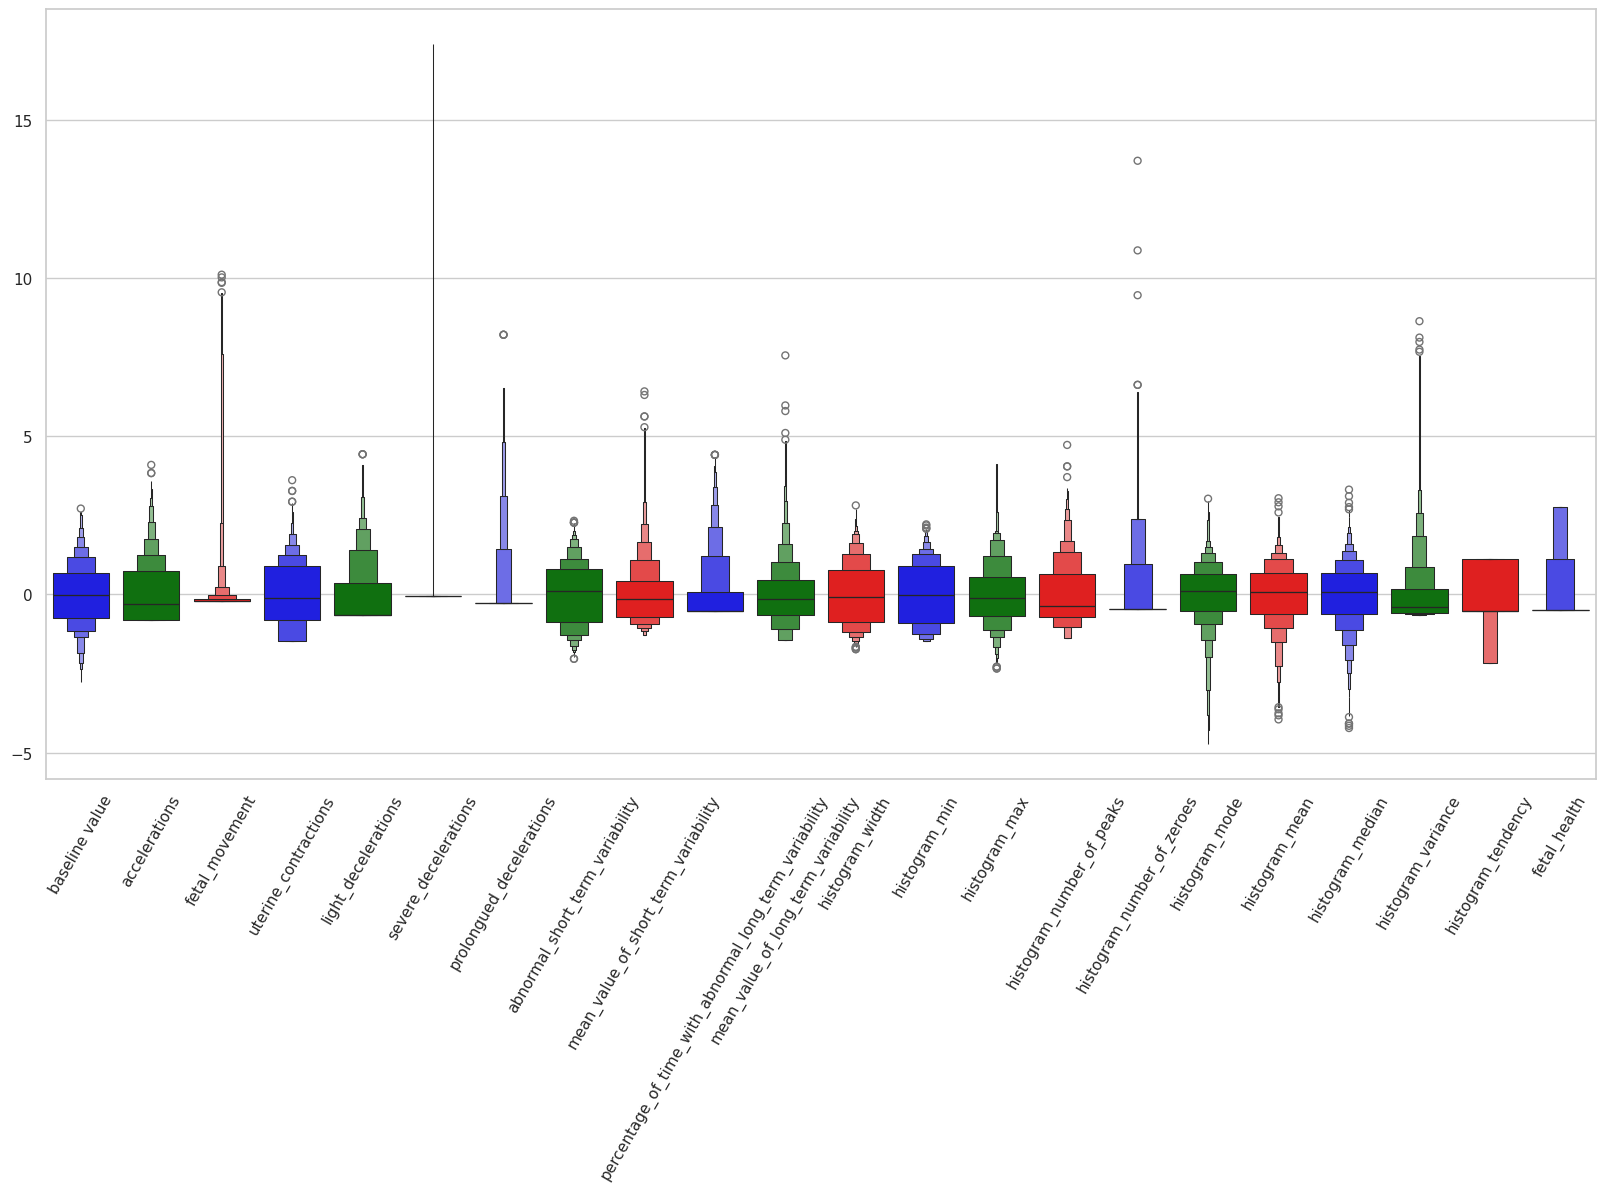

In [74]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(dataframe.columns)
s_scaler = StandardScaler()
X_scaled= s_scaler.fit_transform(dataframe)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T
#Plotting the scaled features using boxen plots
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()


Outliers can be spotted in certain features, which can be called whether to take it along or drop it off.
Assuming outliers aren't cause of the typo or measurement error (human error) I am taking it down to avoid the overfitting of the model as well as the loss of information.

/tmp/ipykernel_46890/697233645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= dataframe, x="fetal_health",palette=colours)


<Axes: xlabel='fetal_health', ylabel='count'>

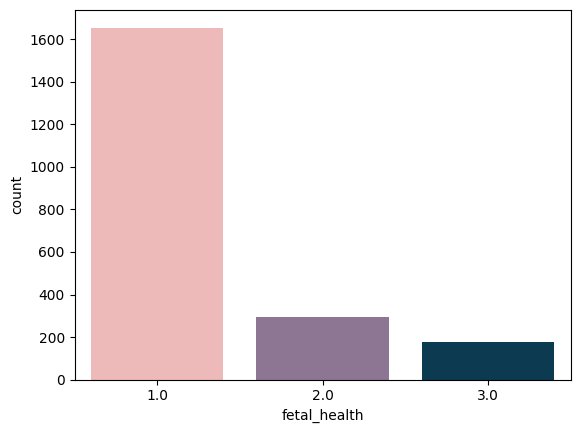

In [22]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= dataframe, x="fetal_health",palette=colours)

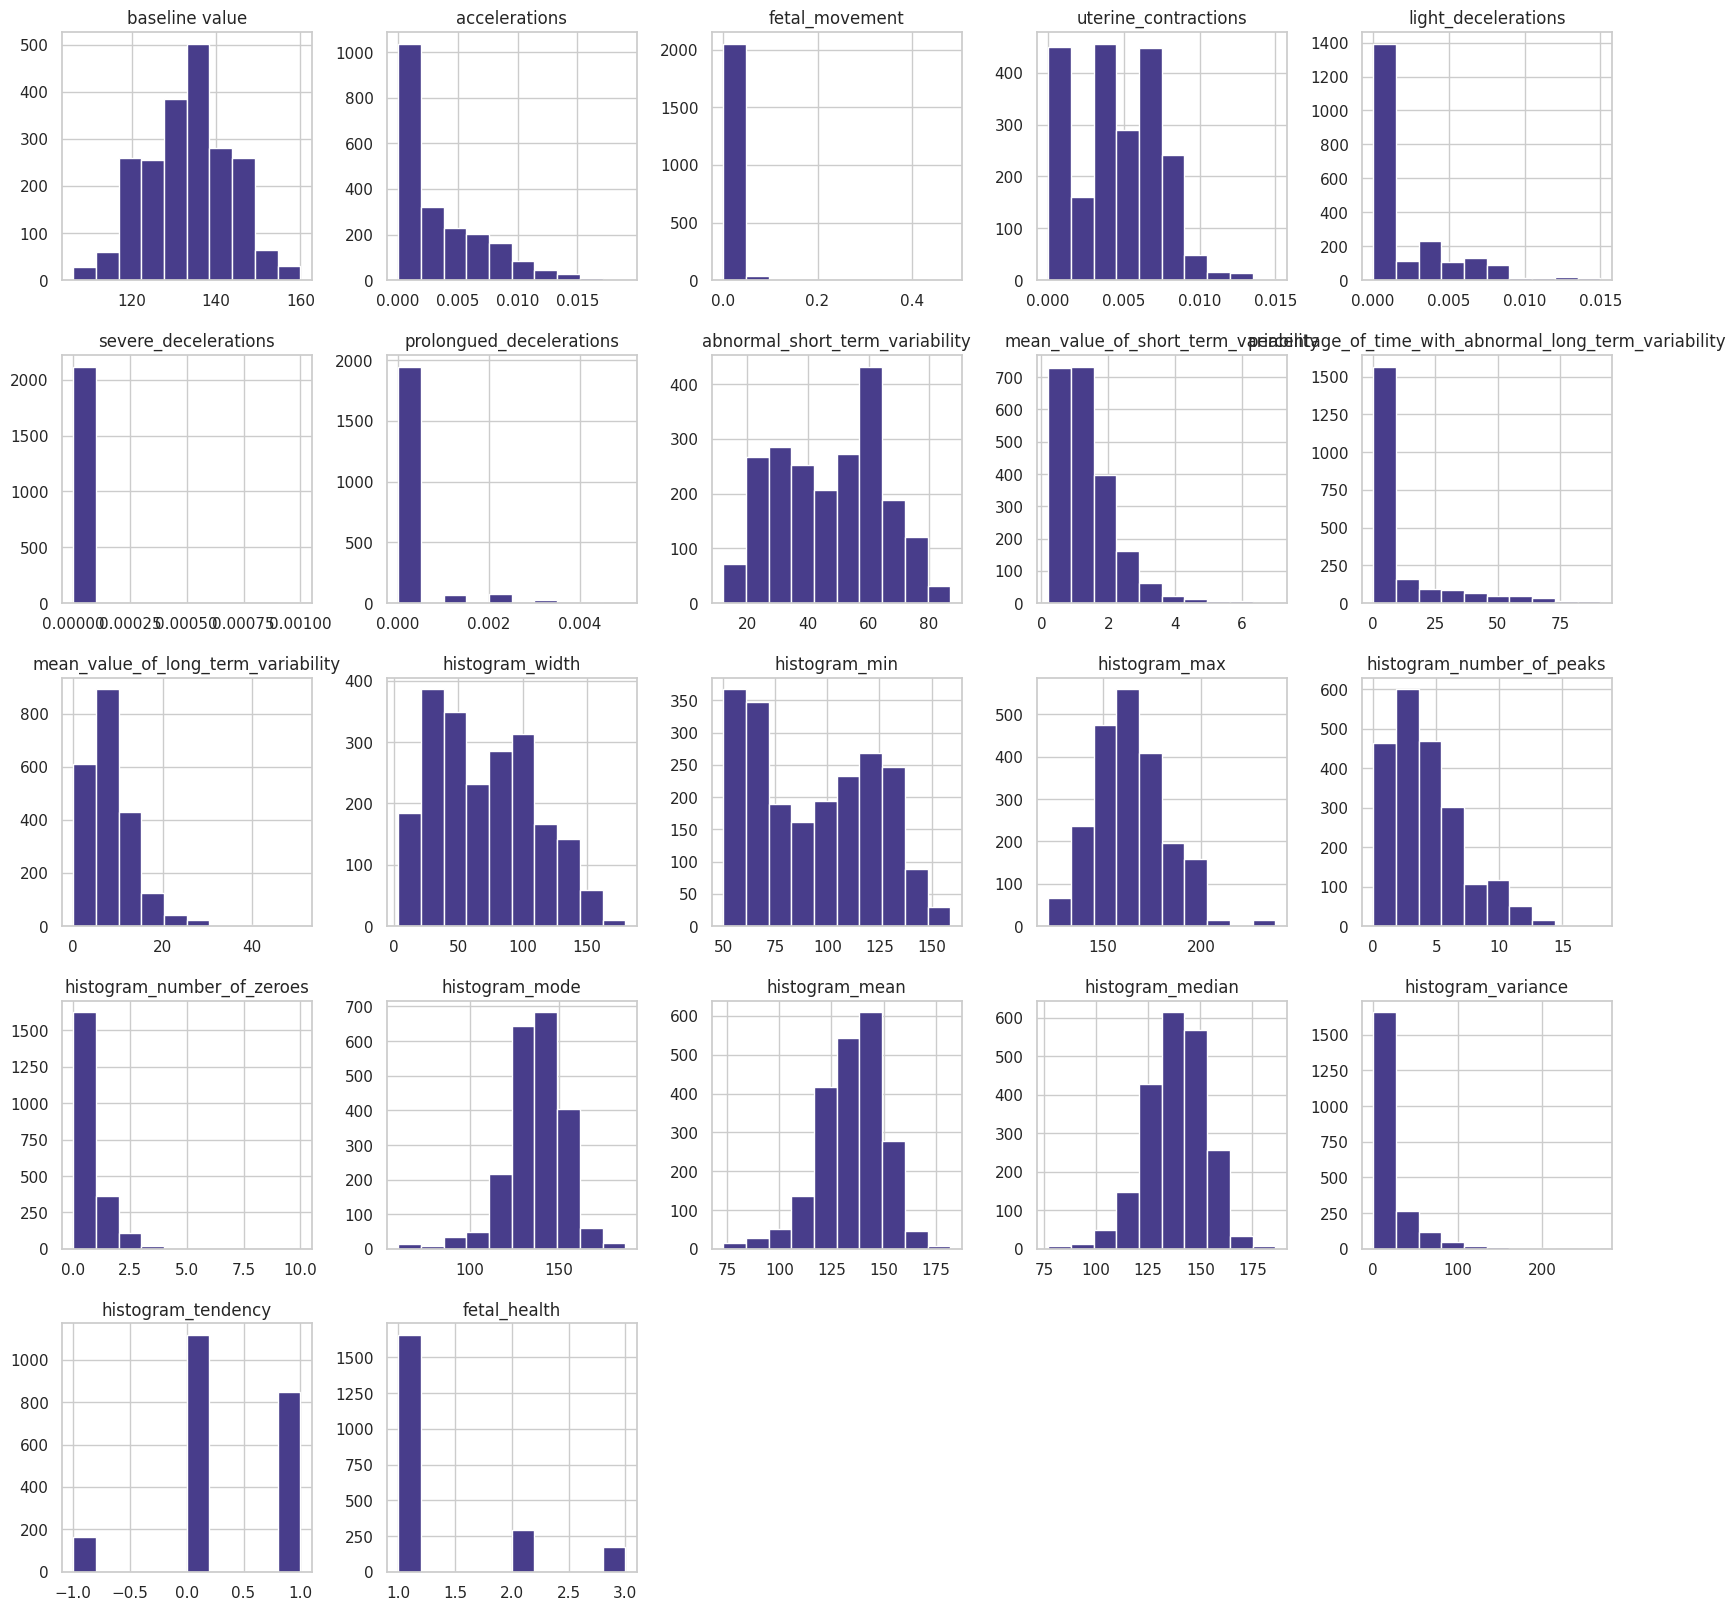

In [69]:
# Evaluating distributions of the features 
hist_plot = dataframe.hist(figsize = (20,20), color = "#483D8B")

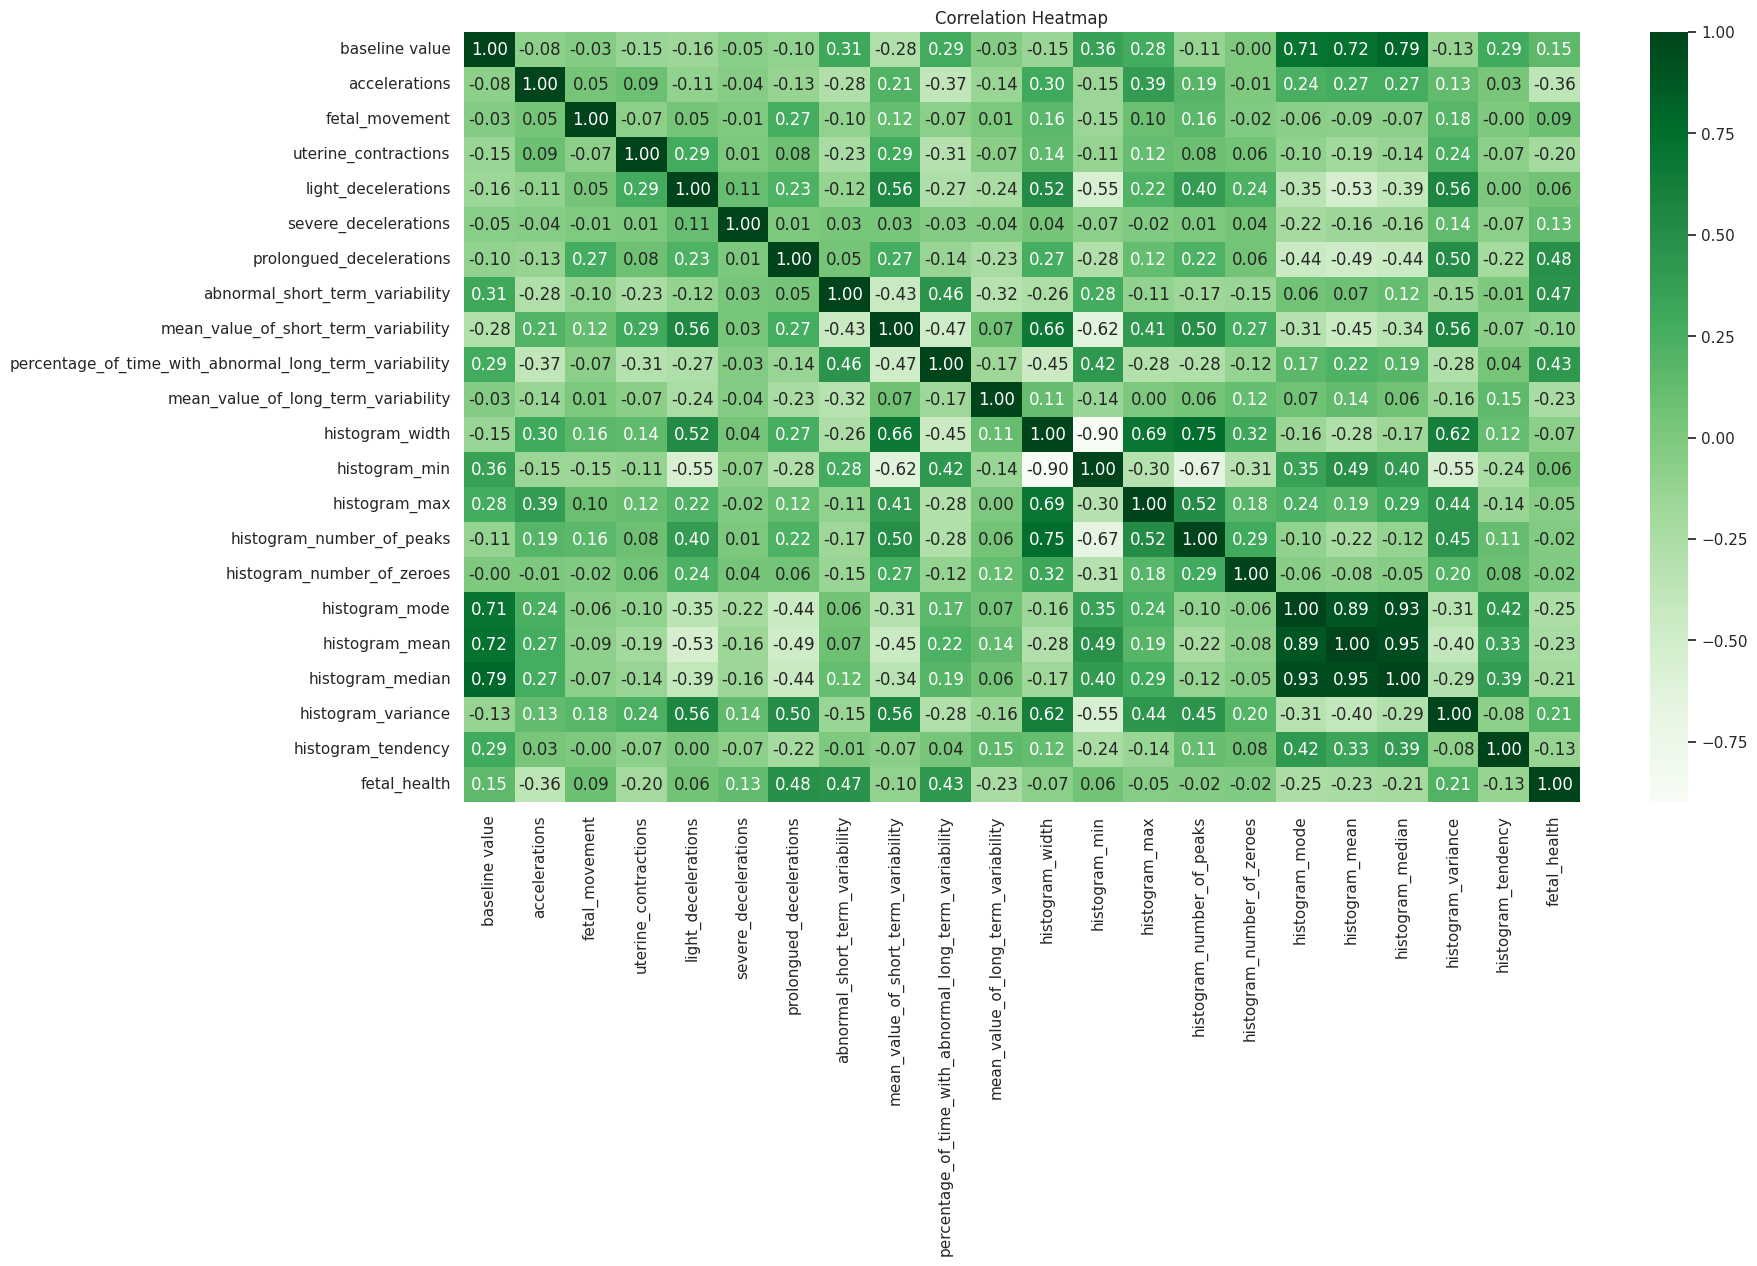

In [40]:
# Create a correlation matrix
correlation_matrix = dataframe.corr()

# Create a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

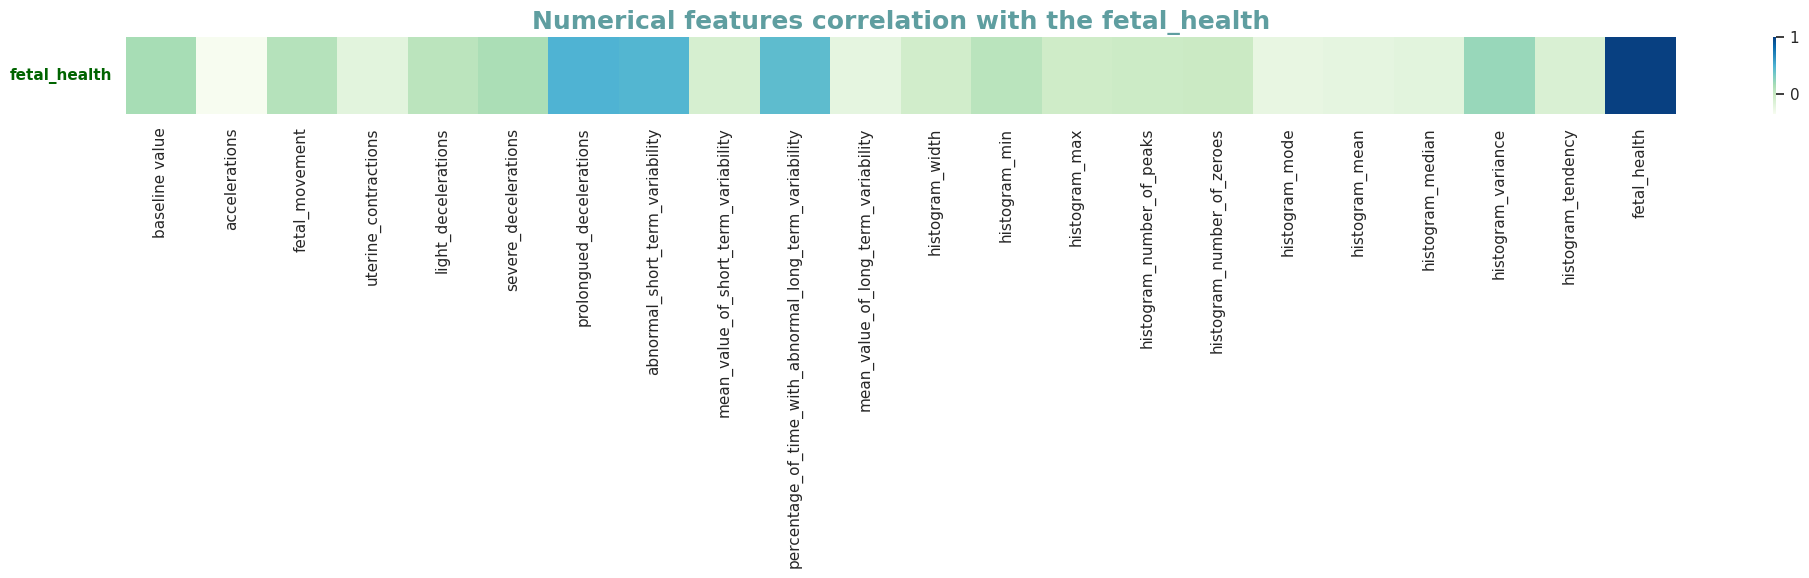

In [75]:
numeric_data = dataframe.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

Based on the correlation matix, it is clear that "accelerations","prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" and "mean_value_of_long_term_variability" are the features with higher correlation with fetal_health. Let's have a closer look at these with fetal_movement on y axis. This will provide a clearer picture of trends that indicate fetus health.

/home/dharsan/.local/lib/python3.10/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


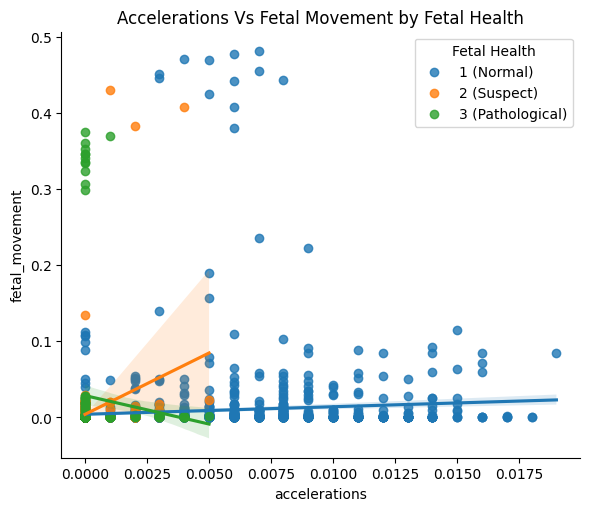

In [24]:
# Define the legend label mapping
legend_labels = {1: '1 (Normal)', 2: '2 (Suspect)', 3: '3 (Pathological)'}

# Create the lmplot with a larger size
plot = sns.lmplot(data=dataframe, x="accelerations", y="fetal_movement", hue="fetal_health", legend_out=False, height=5, aspect=1.2)

# Use the legend_labels mapping to customize the legend
plot._legend.set_title('Fetal Health')
for t, l in zip(plot._legend.texts, legend_labels.values()):
    t.set_text(l)

plt.title("Accelerations Vs Fetal Movement by Fetal Health")
# Show the plot
plt.show()

/home/dharsan/.local/lib/python3.10/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


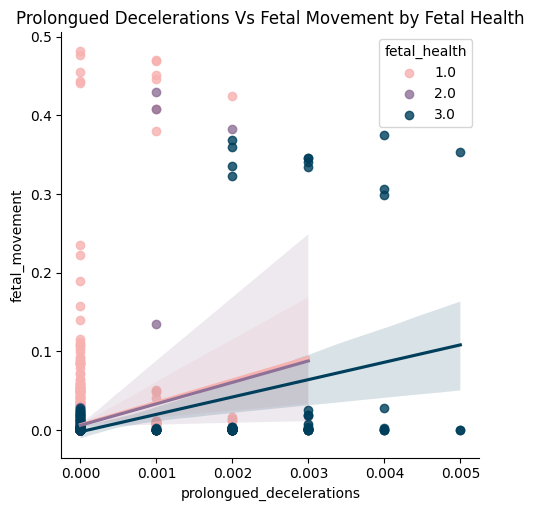

In [25]:
sns.lmplot(data =dataframe,x="prolongued_decelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.title("Prolongued Decelerations Vs Fetal Movement by Fetal Health")
plt.show()

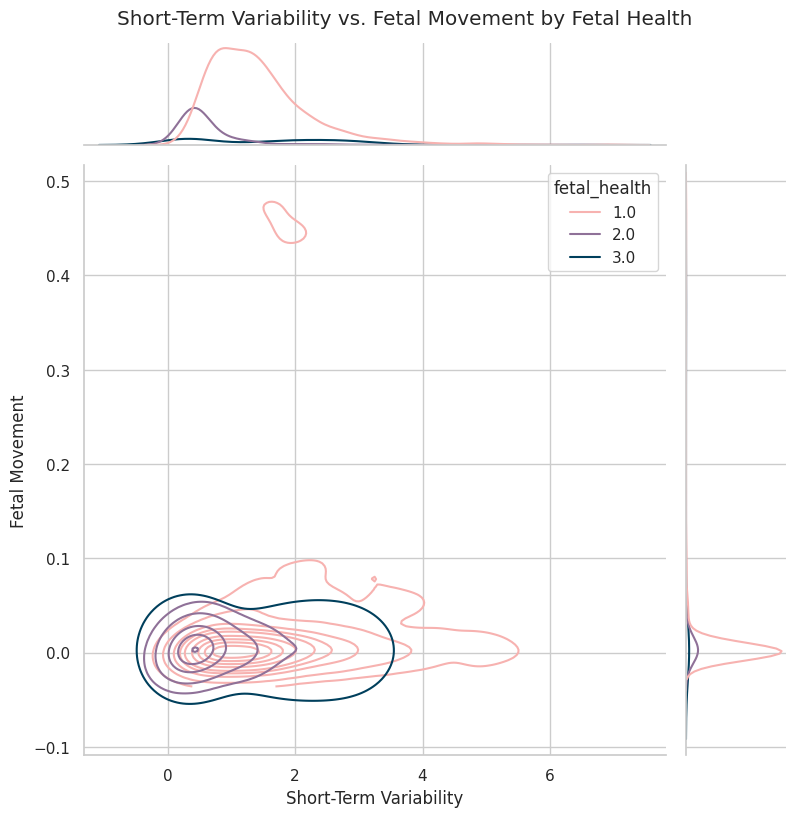

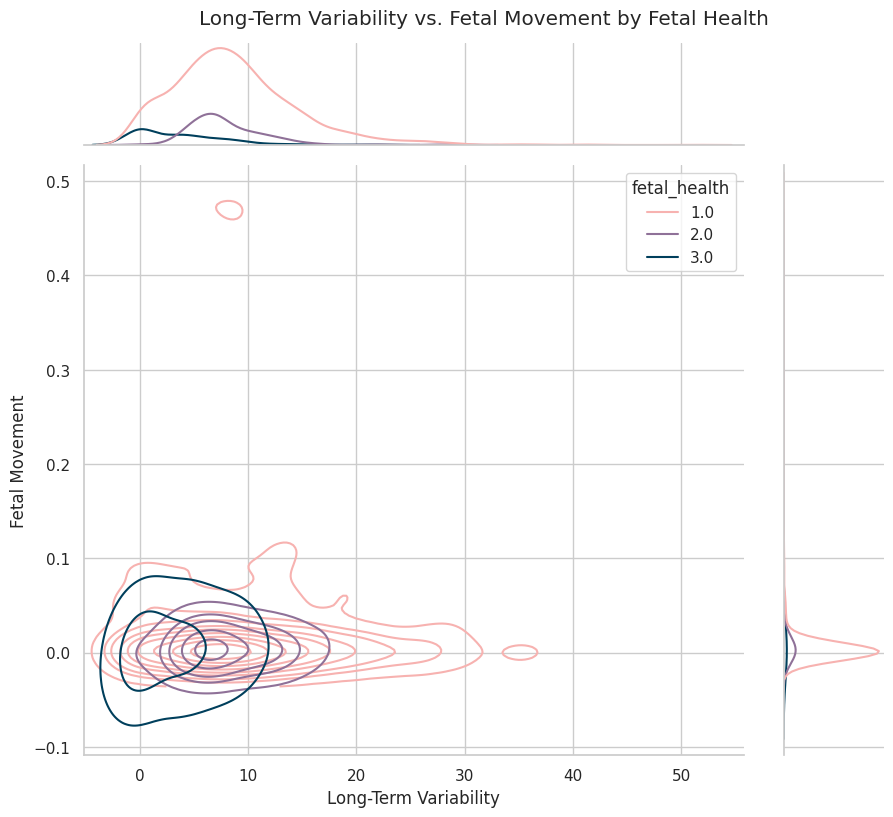

In [26]:
# Create a jointplot for "mean_value_of_short_term_variability" vs. "fetal_movement"
sns.set(style="whitegrid")
joint1 = sns.jointplot(data=dataframe, x="mean_value_of_short_term_variability", y="fetal_movement", kind="kde", hue="fetal_health", palette=colours, height=8)
joint1.fig.suptitle("Short-Term Variability vs. Fetal Movement by Fetal Health", y=1.02)
joint1.ax_joint.set_xlabel("Short-Term Variability")
joint1.ax_joint.set_ylabel("Fetal Movement")

# Create a jointplot for "mean_value_of_long_term_variability" vs. "fetal_movement"
sns.set(style="whitegrid")
joint2 = sns.jointplot(data=dataframe, x="mean_value_of_long_term_variability", y="fetal_movement", kind="kde", hue="fetal_health", palette=colours, height=8)
joint2.fig.suptitle("Long-Term Variability vs. Fetal Movement by Fetal Health", y=1.02)
joint2.ax_joint.set_xlabel("Long-Term Variability")
joint2.ax_joint.set_ylabel("Fetal Movement")

# Show both jointplots side by side
plt.subplots_adjust(left=0, right=1, wspace=0.4)  # Adjust the space between plots
plt.show()


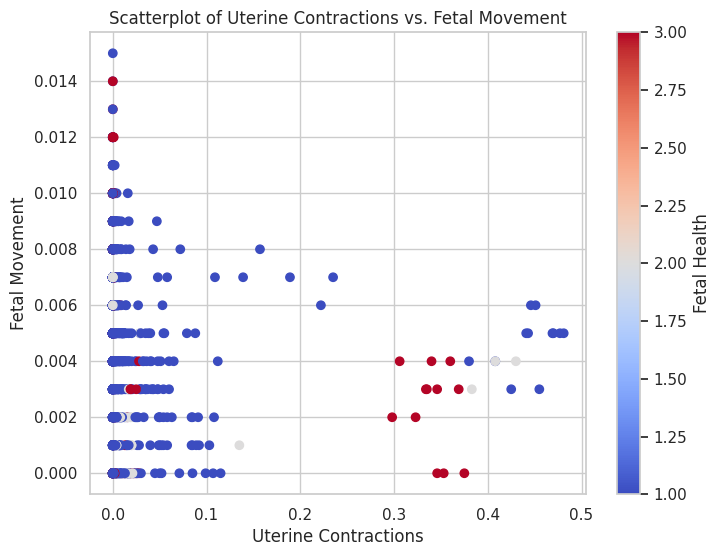

In [27]:
# Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(dataframe['fetal_movement'], dataframe['uterine_contractions'], c=dataframe['fetal_health'], cmap='coolwarm')
plt.colorbar(label='Fetal Health')
plt.xlabel('Uterine Contractions')
plt.ylabel('Fetal Movement')
plt.title('Scatterplot of Uterine Contractions vs. Fetal Movement')
plt.show()

In [32]:
# Define the legend label mapping
legend_labels = {1: '1 (Normal)', 2: '2 (Suspect)', 3: '3 (Pathological)'}
colors = ['blue', 'green', 'red']

# Define the features and target variables
features_to_use = ["prolongued_decelerations", "abnormal_short_term_variability"]
target_variable = "fetal_health"

# Split data into features and target
features = dataframe[features_to_use]
target = dataframe[target_variable]

# Split features into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [33]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('knn_classifier',KNeighborsClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'K Nearest Neighbors ', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.787059 
Decision Tree: 0.826471 
K Nearest Neighbors : 0.827059 
SVC: 0.781176 


KNN (k=7) - Accuracy: 82%


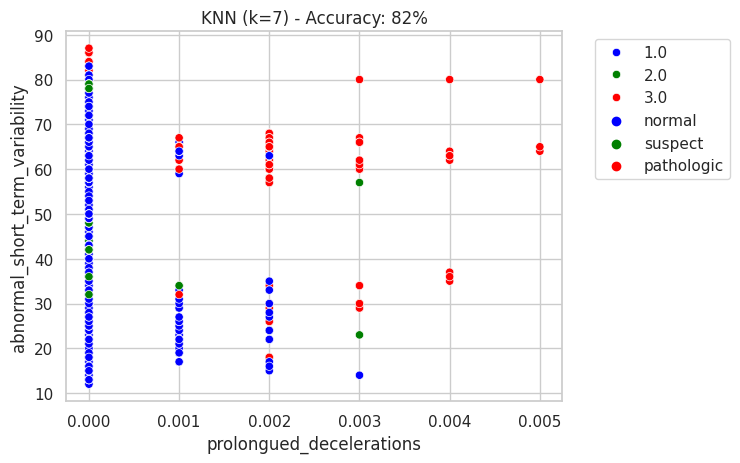

In [64]:
# Perform K-nearest neighbors (KNN) classification
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
accuracy_percentage = accuracy * 100
print(f"KNN (k={k}) - Accuracy: {accuracy_percentage:.0f}%")

# Define colors for each class
class_colors = {
    "normal": "blue",
    "suspect": "green",
    "pathologic": "red"
}

# Plot the KNN results
sns.scatterplot(x=features["prolongued_decelerations"], y=features["abnormal_short_term_variability"], hue=target, palette=colors)

# Manually set the legend labels and colors
legend_labels = list(class_colors.keys())
legend_colors = [class_colors[label] for label in legend_labels]

for label, color in zip(legend_labels, legend_colors):
    plt.scatter([], [], c=color, label=label)

# Position the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title(f'KNN (k={k}) - Accuracy: {accuracy_percentage:.0f}%')
plt.xlabel("prolongued_decelerations")
plt.ylabel("abnormal_short_term_variability")
plt.show()
